In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import pandas as pd
import seaborn as sns

from scipy.stats import linregress

#### Creating Function 
##### Defining the xticks for longitude
##### Defining the yticks for latitude

In [2]:
def label_latlon(ax,lons,lats):
    """ Add tick labels """
    # Define the xticks for longtitude
    ax.set_xticks(lons,crs=ccrs.PlateCarree())
    lon_formatter=cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    # Define ytick for latitude
    ax.set_yticks(lats,crs=ccrs.PlateCarree())
    lat_formatter=cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

    return

##### Function for climatology and anomalies

In [3]:
def climo(ds):
    ds_climo = ds.groupby('time.month').mean(dim='time') # Calculating the climatology
    return ds_climo
def anoms(ds):
    ds_climo= ds.groupby('time.month').mean(dim='time') # Calculating the anomalies
    ds_anoms = ds.groupby('time.month')-ds_climo
    return ds_anoms

#### Read in monthly Soil Moisture data from CCI

In [4]:
file = '/scratch/ntavakol/ntavakol/CCI_Final/CCI_Lon_Monthly.nc'
ds_sm = xr.open_dataset(file)
ds_sm

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lon: 1440, lat: 600)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-16 ... 2020-12-16
  * lon        (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat        (lat) float64 89.88 89.62 89.38 89.12 ... -59.38 -59.62 -59.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    sm         (time, lat, lon) float32 ...
Attributes: (12/47)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.9
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL)
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start:          20110101T000000Z
    time_coverage_end:            20110101T235959Z
    frequency:                    mon
    CDO:                          Climate Data Operators version 1.9.10 (http...

##### Selecting Case study (Australia)

In [5]:
ds_sm1=ds_sm.sel(lon=slice(112,155),lat=slice(-10,-45))
ds_sm1

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lon: 172, lat: 140)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-16 ... 2020-12-16
  * lon        (lon) float64 112.1 112.4 112.6 112.9 ... 154.1 154.4 154.6 154.9
  * lat        (lat) float64 -10.12 -10.38 -10.62 ... -44.38 -44.62 -44.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2011-01-01 2011-01-31 ... 2020-12-31
    sm         (time, lat, lon) float32 ...
Attributes: (12/47)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.9
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL)
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start:          20110101T000000Z
    time_coverage_end:            20110101T235959Z
    frequency:                    mon
    CDO:                          Climate Data Operators version 1.9.10 (http...

#### Read in monthly Actual Evapotranspiration data from TerraClimate

In [6]:
file = '/scratch/ntavakol/ntavakol/aet/TerraClimate_aet.nc'
ds_aet = xr.open_dataset(file)
ds_aet

<xarray.Dataset>
Dimensions:  (time: 120, lon: 8640, lat: 4320)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
Data variables:
    crs      int16 ...
    aet      (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                             Climate Data Interface version 1.9.10 (h...
    Conventions:                     CF-1.6
    source:                          WorldClim v2.0 (2.5m), CRU Ts4.0, JRA-55
    institution:                     University of California Merced
    method:                          These layers from TerraClimate were deri...
    title:                           TerraClimate: monthly climate and climat...
    ...                              ...
    geospatial_vertical_units:       None
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Abatzoglou, J.T., S.Z. Dobrowski, S.A. P...
    version:                         v1.0
    CDO:                             Climate Data Operators version 1.9.10 (h...

##### Selecting Case study (Australia)

In [7]:
ds_aet1=ds_aet.sel(lon=slice(113,154),lat=slice(-10,-44))
ds_aet1

<xarray.Dataset>
Dimensions:  (time: 120, lon: 984, lat: 816)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
Data variables:
    crs      int16 1
    aet      (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                             Climate Data Interface version 1.9.10 (h...
    Conventions:                     CF-1.6
    source:                          WorldClim v2.0 (2.5m), CRU Ts4.0, JRA-55
    institution:                     University of California Merced
    method:                          These layers from TerraClimate were deri...
    title:                           TerraClimate: monthly climate and climat...
    ...                              ...
    geospatial_vertical_units:       None
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Abatzoglou, J.T., S.Z. Dobrowski, S.A. P...
    version:                         v1.0
    CDO:                             Climate Data Operators version 1.9.10 (h...

### Monthly AET Anomaly

##### Calculating the climatology for monthly averaged AET data

In [8]:
aet_climo_month = climo (ds_aet1)
aet_climo_month

<xarray.Dataset>
Dimensions:  (lon: 984, lat: 816, month: 12)
Coordinates:
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (month) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    aet      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating monthly Anomalies for AET by subtracting the climatology from the original data

In [9]:
aet_anoms_month = anoms (ds_aet1)
aet_anoms_month

<xarray.Dataset>
Dimensions:  (time: 120, lon: 984, lat: 816)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    aet      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating mean AET over the entire domain

In [10]:
aet_anoms_month1 = aet_anoms_month.mean(dim=['lat','lon'])
aet_anoms_month1

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    aet      (time) float32 8.098 28.93 27.52 6.639 ... 2.326 8.398 -14.61 28.58

### Read in monthly Southern Oscillation Index data

In [11]:
file = "/home/ntavakol/Assignment3/SOI.csv"
df = pd.read_csv(file)
df

,YEAR,MONTH,SOI
0,2011,1,1.7
1,2011,2,2.0
2,2011,3,1.8
3,2011,4,1.2
4,2011,5,0.4
...,...,...,...
115,2020,8,1.0
116,2020,9,1.3
117,2020,10,0.8
118,2020,11,1.1


#### Converting CSV file into an xarray. Dataset

In [12]:
start_date=str(df.YEAR[0])+'-'+str(df.MONTH[0])+'-01'
end_date=str(df.YEAR[119])+'-'+str(df.MONTH[119])+'-01'
print(start_date)
print(end_date)

2011-1-01
2020-12-01


In [13]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')

In [14]:
ds_index=xr.DataArray(df['SOI'],
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='SOI')
ds_index

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
Data variables:
    SOI      (time) float64 1.7 2.0 1.8 1.2 0.4 0.6 ... 0.6 1.0 1.3 0.8 1.1 1.4

### Monthly SM Anomaly

##### Calculating the climatology for monthly averaged SM data

In [15]:
ds_climo_sm = climo(ds_sm1)
ds_climo_sm

<xarray.Dataset>
Dimensions:  (lon: 172, lat: 140, month: 12)
Coordinates:
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 154.1 154.4 154.6 154.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -44.38 -44.62 -44.88
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating monthly Anomalies for SM by subtracting the climatology from the original data

In [16]:
ds_anoms_sm = anoms(ds_sm1)
ds_anoms_sm

<xarray.Dataset>
Dimensions:  (time: 120, lon: 172, lat: 140)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-16 2011-02-14T12:00:00 ... 2020-12-16
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 154.1 154.4 154.6 154.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -44.38 -44.62 -44.88
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating mean SM over the entire domain

In [17]:
ds_anoms_sm1 = ds_anoms_sm.mean(dim=['lat','lon'])
ds_anoms_sm1

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-16 2011-02-14T12:00:00 ... 2020-12-16
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (time) float32 0.02646 0.04981 0.05406 ... -0.007442 0.0137

#### Linear Regression

#### Finding Linear Regression between SM and SOI

In [18]:
# Find the size of the global grid array
nx = len(ds_anoms_sm['lon'])
ny = len(ds_anoms_sm['lat'])

# Create new empty arrays to contain the results of our calculations
p_array = np.zeros((ny,nx))   # The p-value (significance) of the fit of the regression
r_array = np.zeros((ny,nx))   # The correlation between the independent and dependent variables
m_array = np.zeros((ny,nx))   # The slope of the best-fit linear regression line

x =       ds_index['SOI']    # The independent variable (predictor)

#### Loop through all the grid cells in the global grid
for j in range(ny):
    print(f"{j},",end=" ")
    for i in range(nx):
        
        y = ds_anoms_sm['sm'][:,j,i] # The dependent variable (predictand)
        
        m,b,r,p,e = linregress(x,y)   # b is intercept, e is standard error
        
        # Populate our new arrays with the results
        m_array[j,i] = m
        r_array[j,i] = r
        p_array[j,i] = p
print("*** DONE ***")

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, *** DONE ***


##### Make a mask
###### Only include points where our regression coefficient is significantly different from zero

In [19]:
mask_sig = np.where(p_array<0.05,m_array,np.nan) # NaNs where the signficance test fails

##### Plot the regression coefficient between SM and SOI

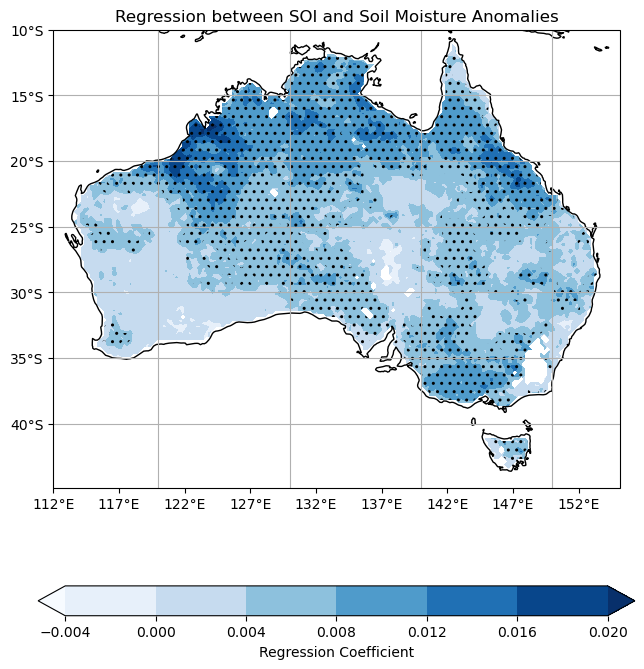

In [20]:
#clevs=np.arange(-0.1,0.2,0.1)
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point
data = m_array
data,lon = add_cyclic_point(data,coord=ds_anoms_sm['lon'])
mask_data,lons = add_cyclic_point(mask_sig,coord=ds_anoms_sm['lon'])

# Make a filled contour plot
cs = ax.contourf(lon,ds_anoms_sm['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='Blues',extend='both')

ax.contourf(lon,ds_anoms_sm['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['..','..'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude and ytick for latitude
label_latlon(ax,np.arange(112,155,5),np.arange(-10,-45,-5))

# Call colorbar
cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient')

# Add title
plt.title('Regression between SOI and Soil Moisture Anomalies') 
plt.savefig('Regression between SOI and Soil Moisture Anomalies.png', dpi=300, bbox_inches='tight');

##### Plot the Correlation Coefficient between SM and SOI

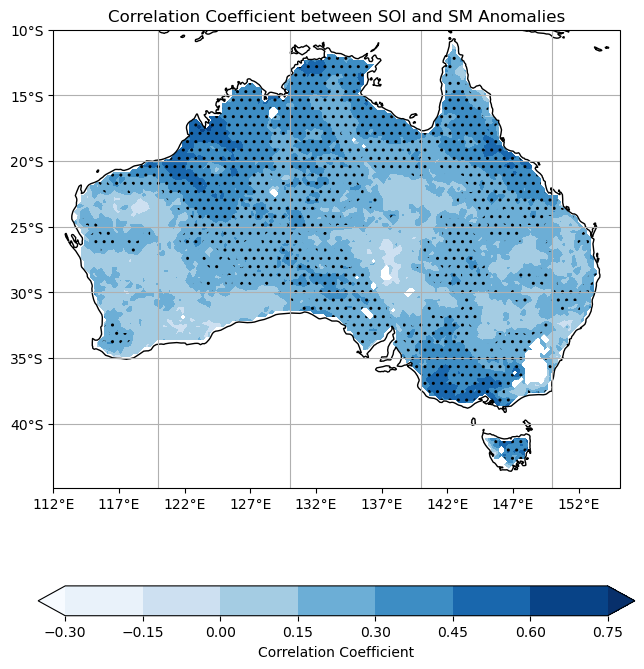

In [24]:
clevs=np.arange(-0.30,0.75,0.15)
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point
data = r_array
data,lon = add_cyclic_point(data,coord=ds_anoms_sm['lon'])
mask_data,lons = add_cyclic_point(mask_sig,coord=ds_anoms_sm['lon'])

# Make a filled contour plot
cs = ax.contourf(lon,ds_anoms_sm['lat'],
            data,clevs,transform=ccrs.PlateCarree(),
            cmap='Blues',extend='both')

ax.contourf(lon,ds_anoms_sm['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['..','..'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude and ytick for latitude
label_latlon(ax,np.arange(112,155,5),np.arange(-10,-45,-5))

# Call colorbar
cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation Coefficient between SOI and SM Anomalies') 
plt.savefig('Correlation Coefficient between SOI and Soil Moisture Anomalies.png', dpi=300, bbox_inches='tight');

##### Finding Linear Regression between AET and SOI

In [22]:
# Find the size of the global grid array
nx = len(aet_anoms_month['lon'])
ny = len(aet_anoms_month['lat'])

# Create new empty arrays to contain the results of our calculations
p_array = np.zeros((ny,nx))   # The p-value (significance) of the fit of the regression
r_array = np.zeros((ny,nx))   # The correlation between the independent and dependent variables
m_array = np.zeros((ny,nx))   # The slope of the best-fit linear regression line

x =      ds_index['SOI']    # The independent variable (predictor)

#### Loop through all the grid cells in the global grid
for j in range(ny):
    print(f"{j},",end=" ")
    for i in range(nx):
        
        y = aet_anoms_month['aet'][:,j,i] # The dependent variable (predictand)
        
        m,b,r,p,e = linregress(x,y)   # b is intercept, e is standard error
        
        # Populate our new arrays with the results
        m_array[j,i] = m
        r_array[j,i] = r
        p_array[j,i] = p
print("*** DONE ***")

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

##### Make a mask
###### Only include points where our regression coefficient is significantly different from zero

In [23]:
mask_sig = np.where(p_array<0.05,m_array,np.nan) # NaNs where the signficance test fails

##### Plot the regression coefficient between AET and SOI

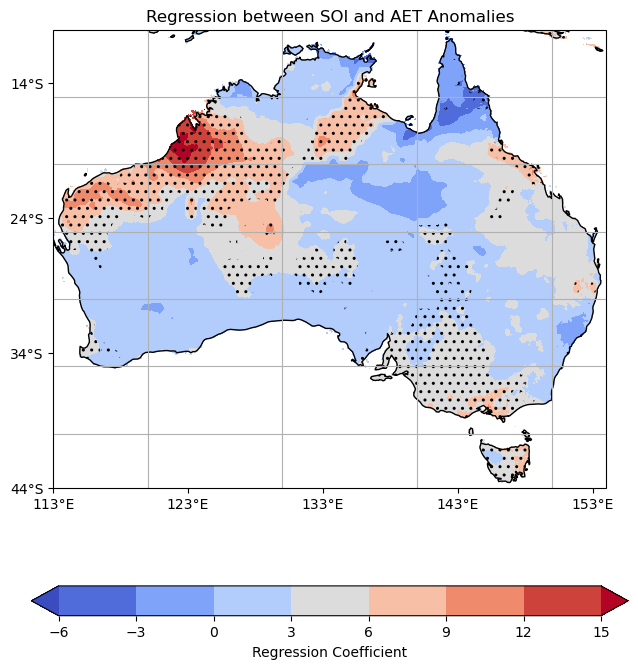

In [24]:
clevs=np.arange(-6,16,3)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point
data = m_array
data,lon = add_cyclic_point(data,coord=aet_anoms_month['lon'])
mask_data,lons = add_cyclic_point(mask_sig,coord=aet_anoms_month['lon'])

# Make a filled contour plot
cs = ax.contourf(lon,aet_anoms_month['lat'],
            data, clevs,
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',extend='both')

ax.contourf(lon,aet_anoms_month['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['..','..'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude and ytick for latitude
label_latlon(ax,np.arange(113,154,10),np.arange(-44,-10,10))

# Call colorbar
cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient')

# Add title
plt.title('Regression between SOI and AET Anomalies') 
plt.savefig('Regression between SOI and AET Anomalies.png', dpi=300, bbox_inches='tight');

##### Plot the Correlation Coefficient between AET and SOI

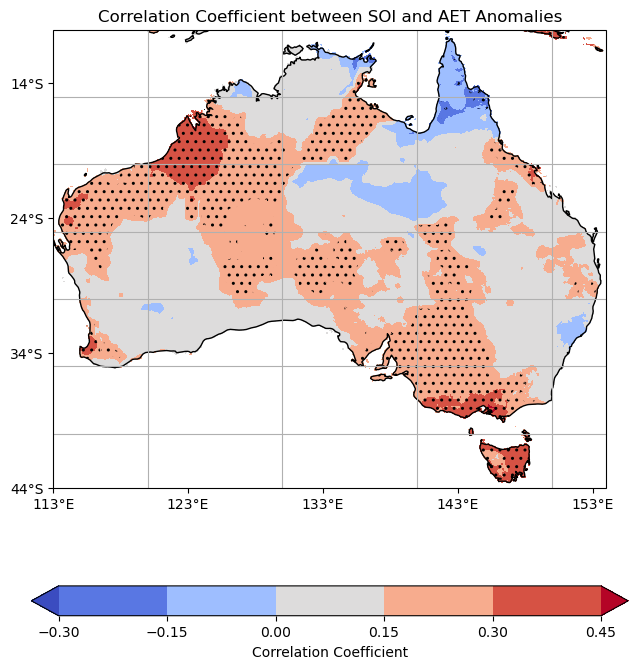

In [25]:
clevs=np.arange(-0.3,0.45,0.15)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point
data = r_array
data,lon = add_cyclic_point(data,coord=aet_anoms_month['lon'])
mask_data,lons = add_cyclic_point(mask_sig,coord=aet_anoms_month['lon'])

# Make a filled contour plot
cs = ax.contourf(lon,aet_anoms_month['lat'],
            data, 
            transform=ccrs.PlateCarree(),
            cmap='coolwarm',extend='both')

ax.contourf(lon,aet_anoms_month['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['..','..'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude and ytick for latitude
label_latlon(ax,np.arange(113,154,10),np.arange(-44,-10,10))

# Call colorbar
cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation Coefficient between SOI and AET Anomalies') 
plt.savefig('Correlation Coefficient between SOI and AET Anomalies.png', dpi=300, bbox_inches='tight');